## Minimax Optimization of Piecewise Linear Function Approximation over Weighted Error Metrics
Kaitlyn Tang, 7/18/2023

### Abstract
The optimal minimax solution to the N segment piecewise linear approximation of convex differentiable functions where the error metric is weighted is described. The problem is formulated as a convex optimization problem for which a gradient descent recursive algorithm had been previously demonstrated.  A modification of the algorithm to support the weighted error metric is presented, and the conditions for the weighting functions under which convexity remains valid is discussed.  Example applications are shown, namely for the use cases where rather than approximating the function, the goal of the PWL is to approximate the function inverse or to minimize the Euclidean distance to the function, with results from the algorithm implementation and achievable error under the weighting metric.  

### Keywords
Keywords—optimal, minimax, piecewise, linear, convex, approximation, distance, weighted, metric

### Overview

Approximation of functions by piecewise linear (PWL) functions are widely used in many hardware and software computing applications.  PWL functions allow the representation of arbitrary functions to any accuracy by simply increasing the number of segments until the desired accuracy is met.  

For a convex or concave function or curve segment, there exists a point in the curve where the tangent at that point is parallel to the line connecting the endpoints of the segment.  Furthermore, the maximum distance in the y direction between the line and the curve occurs at that tangent point.

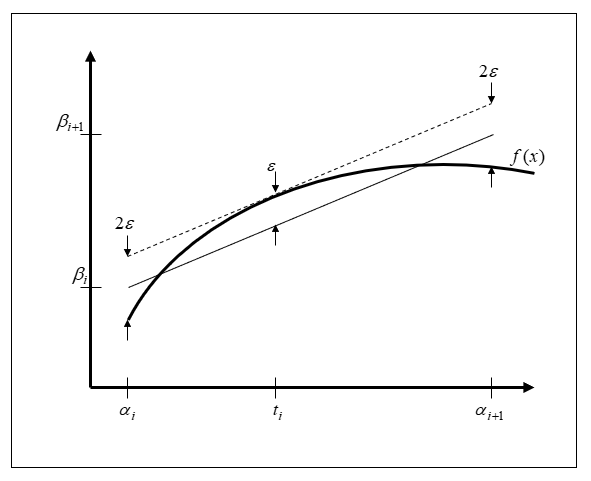

A continuous N segment PWL approximation can thus be defined for a concave function to be fully defined by N points and slopes at those points (defining line segments), which we refer to as "pivots", and the intersection of those lines defines the transitions in the PWL function, which we refer to as "knots"

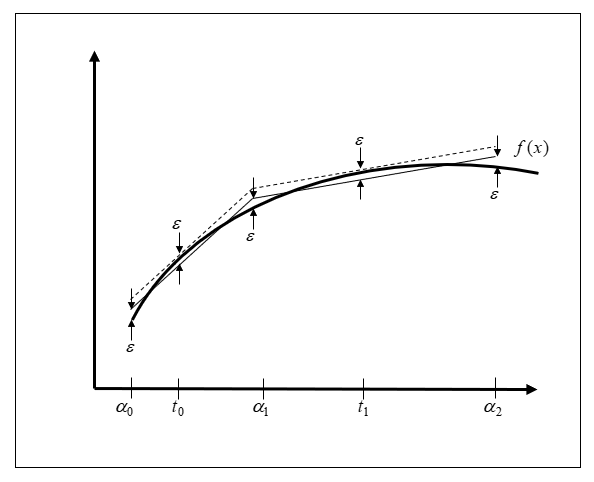

It has previously been shown in [1] that the optimal N-segment minimax PWL approximation to any concave or convex function over a given range can be constructed when the N pivots and tangent segments chosen such that the error at the knots are equal, and then shifted so that the magnitude of the error is equal at the knots and pivots.

In this work, we demonstrate examples under which the error is weighted by a weighting function, such that the maximum weighted error is minimized by using a modified algorithm, where the weighted error replaces the error in the algorithm provided by [1]

### Error Metric

The standard error metric, the difference between the pwl approximation and the function is used as the basis for the error metric, and the standard error metric corresponds to the case where the weighting function is a constant.

When the weighting function is chosen as
$$ w(x) = \frac {1}{f'(x)} $$
the weighted error metric minimizes the horizontal distance between the knots and the function.  This optimizes the usage of the pwl as an approximation of the function inverse.

When the weighting function is chosen as
$$ w(x) = \sqrt \frac{1}{1+f'(x)^2} $$
the weighted error metric minimizes the normal distance between the knots and the function.  This optimizes the usage of the pwl as a path approximation of the function.

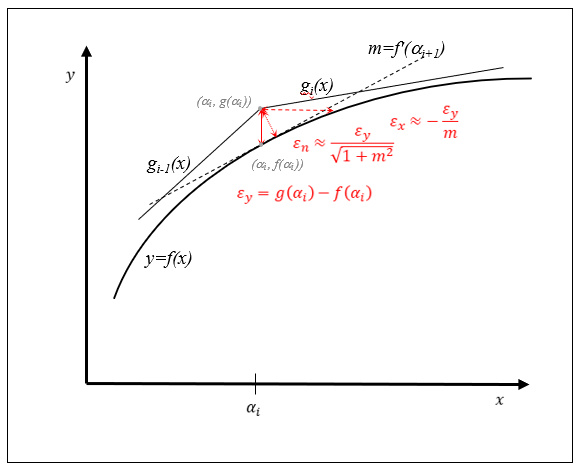

### The Algorithm

The code below follows the algorithm as suggested in the paper.

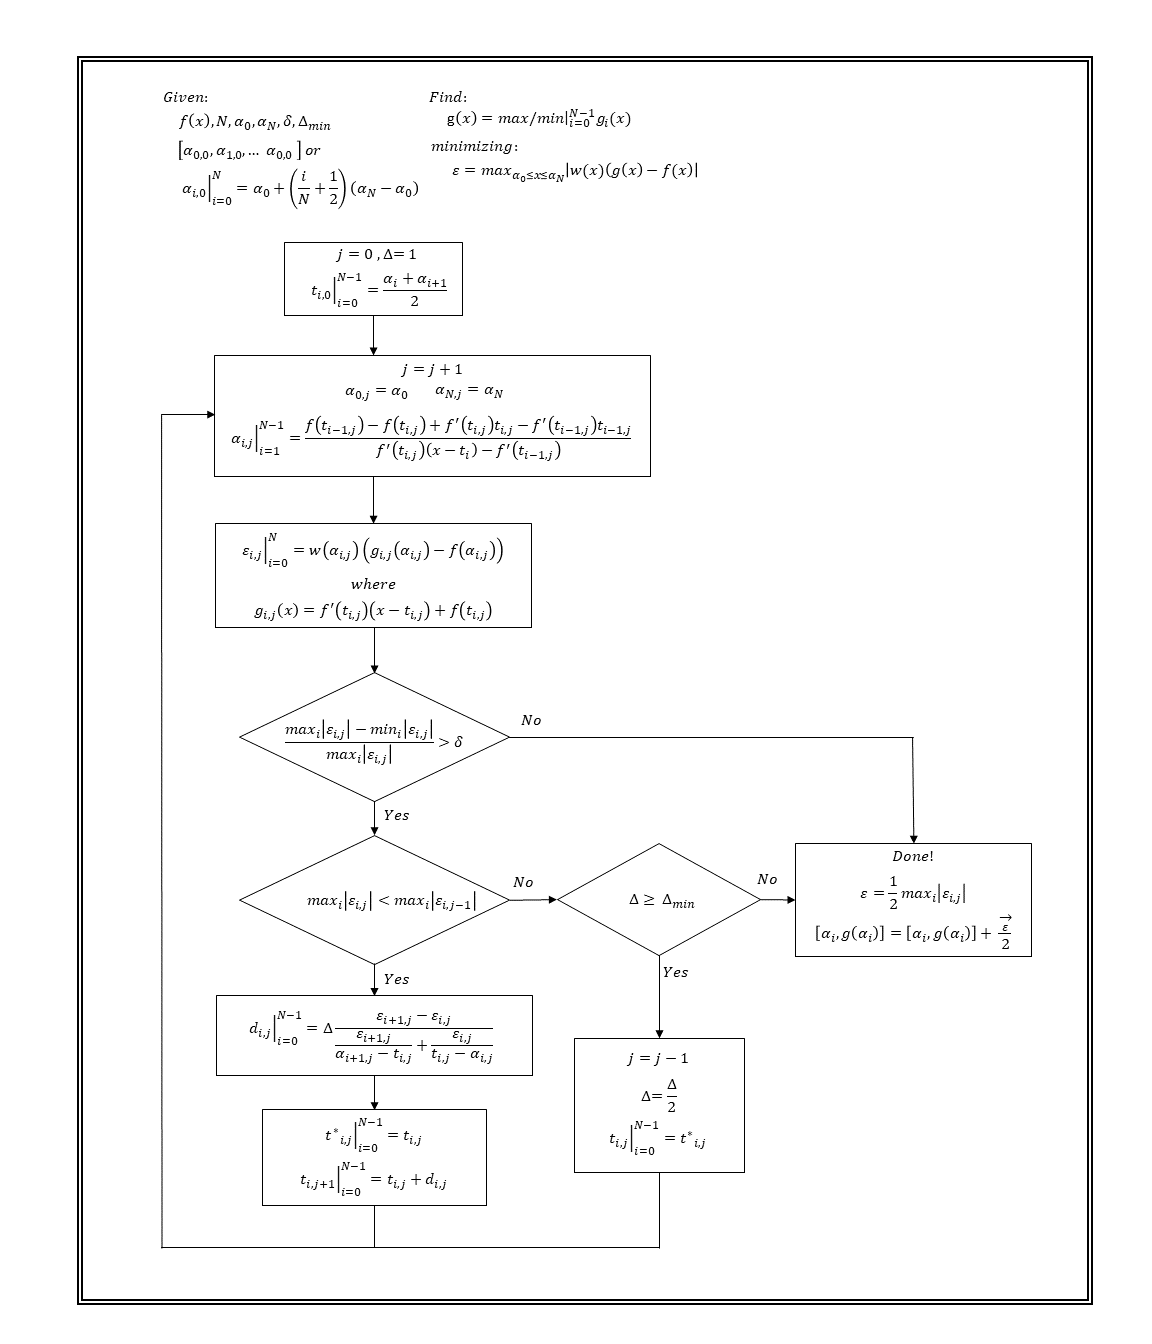

### Comparison of $\varepsilon_y$ vs. $\varepsilon_x$ Example
- Use mode = $\varepsilon_y$ to approximate $f(x) = sin(\frac{\pi}{2} x)$ with optimal minimax error
- Use $f(x)$, mode = $\varepsilon_x$ to approximate $f^{-1}(y) = \frac{2}{\pi} sin^{-1}(y)$, with optimal minimax error
- Compare suboptimal error using $f(x)$, mode = $\varepsilon_y$ to approximate $f^{-1}(y) = \frac{2}{\pi} sin^{-1}(y)$ instead of using optimal  mode = $\varepsilon_x$

This example code demonstrates how the pwl optimized with the function and mode="ey" is optimized for minimizing the max error when approximating the function, and is equivalent to the weighted metric with a constant weight of 1.

This example code demonstrates how the pwl optimized with the function and mode="ex" is optimized for minimizing the max error when approximating the function inverse, and using the weighted metric with a weight of $-\frac{1}{f'(x)}$ is equivalent to the pwl optimized with the function inverse and mode = "ey".

One application case for this weighted metric is where the function inverse needs to be optimized, but cannot be evaluated, and we must rely on evaluating the function instead.

In [ ]:
# Import PWL class Definition and helper functions from pwlClass.py
from pwlClass import *

Mounted at /content/drive


In [ ]:
# Example: f(x) =  sin(x), mode = "ex" and "ey"
def f1(x):
    xclip = np.clip(x, -1, 1)
    return (np.sin(np.pi * xclip / 2))

def f1_inv(y):
    yclip = np.clip(y, -1, 1)
    return (np.arcsin(yclip) * 2 / np.pi)

loopCntlDict={"minStep": 1/1024, "loopLim": 200000, "printSum": False, "relLim": 0.001}
xmin = 0
xmax = 1
mode = "ey"

# fx is an example of using pwl to approximate fx
fx = pwl(f1, xmin=xmin, xmax=xmax, N=32 ,mode=mode, loopCntlDict=loopCntlDict)

reverting at step 47 0.00031131365986565573
Relative Error  0.000997681545460027 met at loopCnt  2996


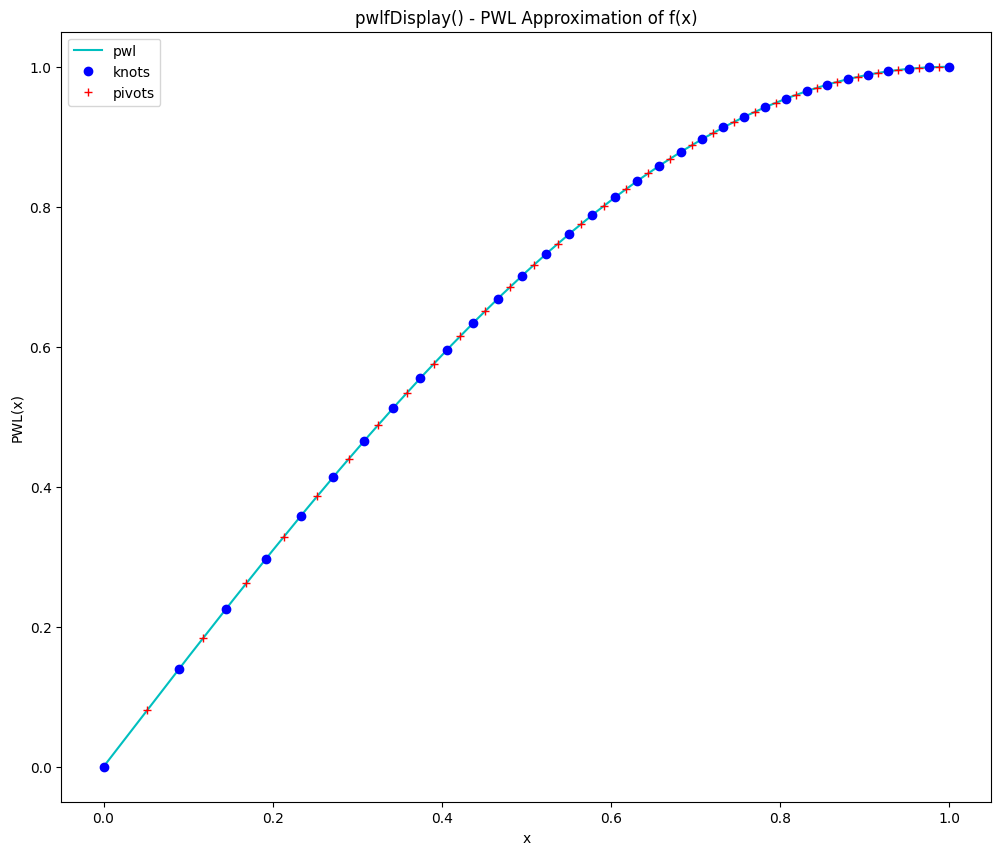

In [ ]:
pwlfDisplay(fx)

Figure saved to  sinx_tan_ey.png


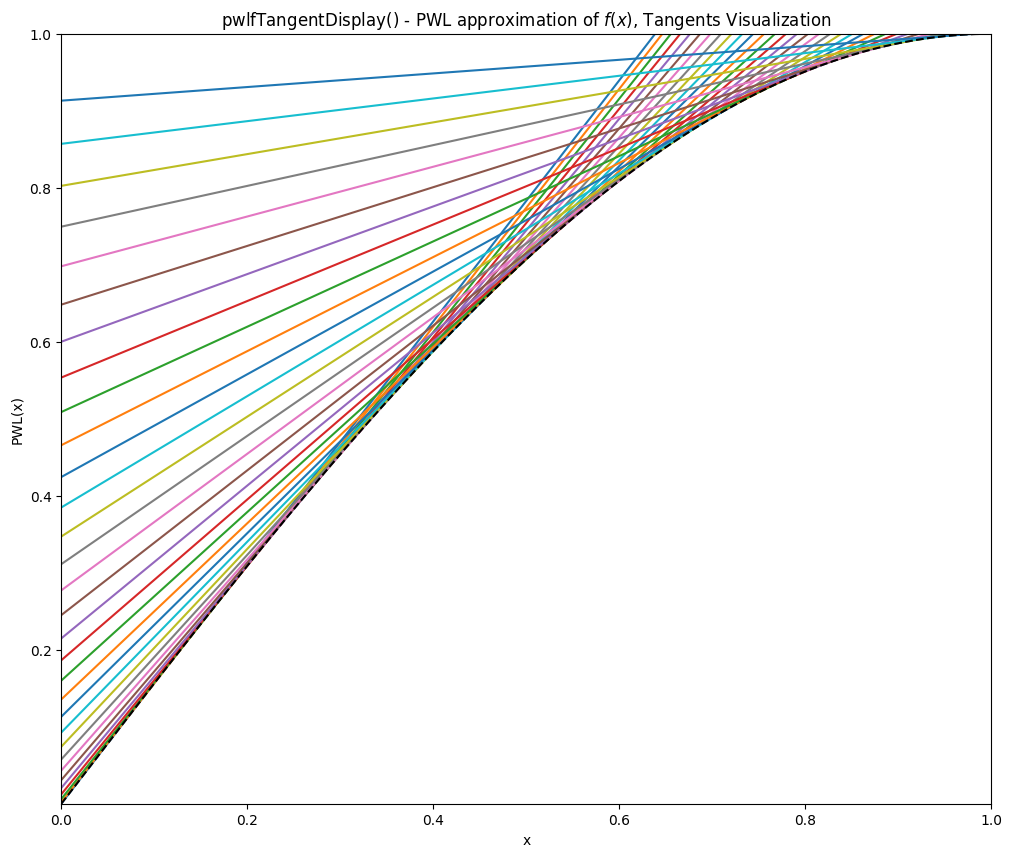

In [ ]:
pwlfTangentDisplay(fx, title = 'pwlfTangentDisplay() - PWL approximation of $f(x)$, Tangents Visualization', fn = 'sinx_tan_ey.png')

Figure saved to  sinx_error_ey.png


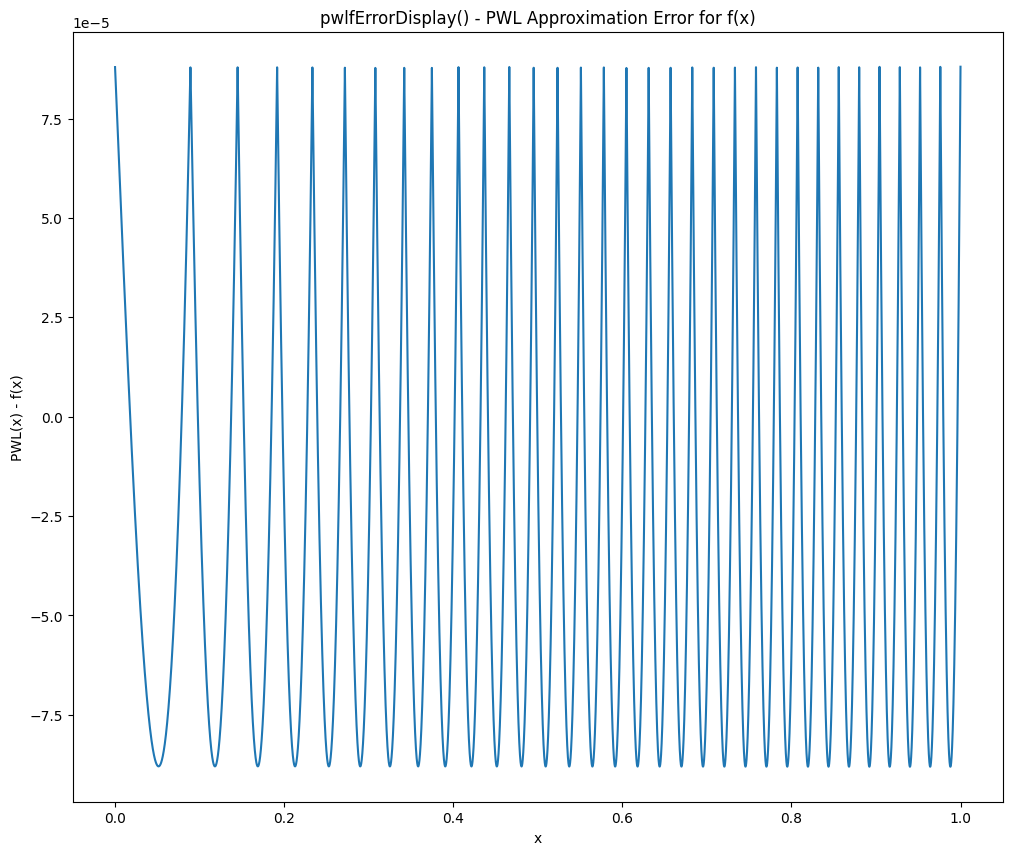

In [ ]:
pwlfErrorDisplay(fx, fn = 'sinx_error_ey.png')

In [ ]:
# fx1 is an example of using pwl and ex to approximate the inverse of f1, it should be equivalent to f_inv (inverse of f1 approximated by ey)
fx1 = pwl(f1, xmin=xmin, xmax=xmax, N=32 , mode= "ex", loopCntlDict=loopCntlDict)
fx_inv = pwl(f1_inv, xmin=xmin, xmax=xmax, N=32 ,mode=mode, loopCntlDict=loopCntlDict)

reverting at step 147 0.0008518961014822418
Relative Error  0.0009981512129421486 met at loopCnt  3390
reverting at step 223 0.0008821057314636754
Relative Error  0.0009998161782112235 met at loopCnt  3461


Figure saved to  sinx_tan_ex.png


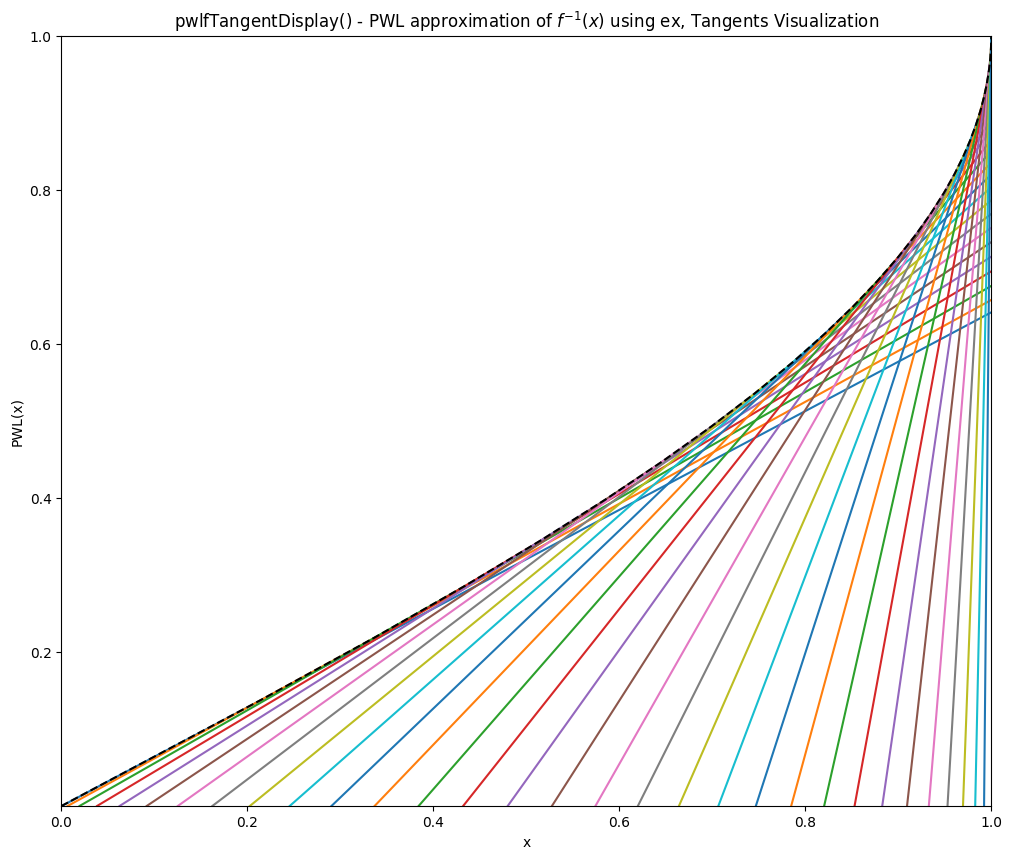

In [ ]:
# Function to graph the tangent display for the approximation of f using ex

def pwlfInvTangentDisplay(f1: pwl, f1_inv = f1_inv, pts = 40001, fn ="", title=""):
    # Plot the PWL function tangents at pivots
    x = np.linspace(f1.xmin, f1.xmax, pts)
    for i in range(f1.N - 1):
        y = f1.f(f1.pivot[i]) + f1.df(f1.pivot[i]) * (x - f1.pivot[i])
        plt.plot(y, x)
    plt.plot(x, f1.finvpwl(x), linestyle='--', color='black')
    if title == "":
        title = "pwlfTangentDisplay() - PWL approximation of f(x), Tangents Visualization"
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("PWL(x)")
    plt.xlim(f1.xmin, f1.xmax)
    plt.ylim(min(f1.fknot), max(f1.fknot))
    if fn != "":
        plt.savefig(fn)
        print("Figure saved to ", fn)
    plt.show()

pwlfInvTangentDisplay(fx1, f1_inv, title = 'pwlfTangentDisplay() - PWL approximation of $f^{-1}(x)$ using ex, Tangents Visualization', fn = 'sinx_tan_ex.png')

Figure saved to  sinx_error_ex.png


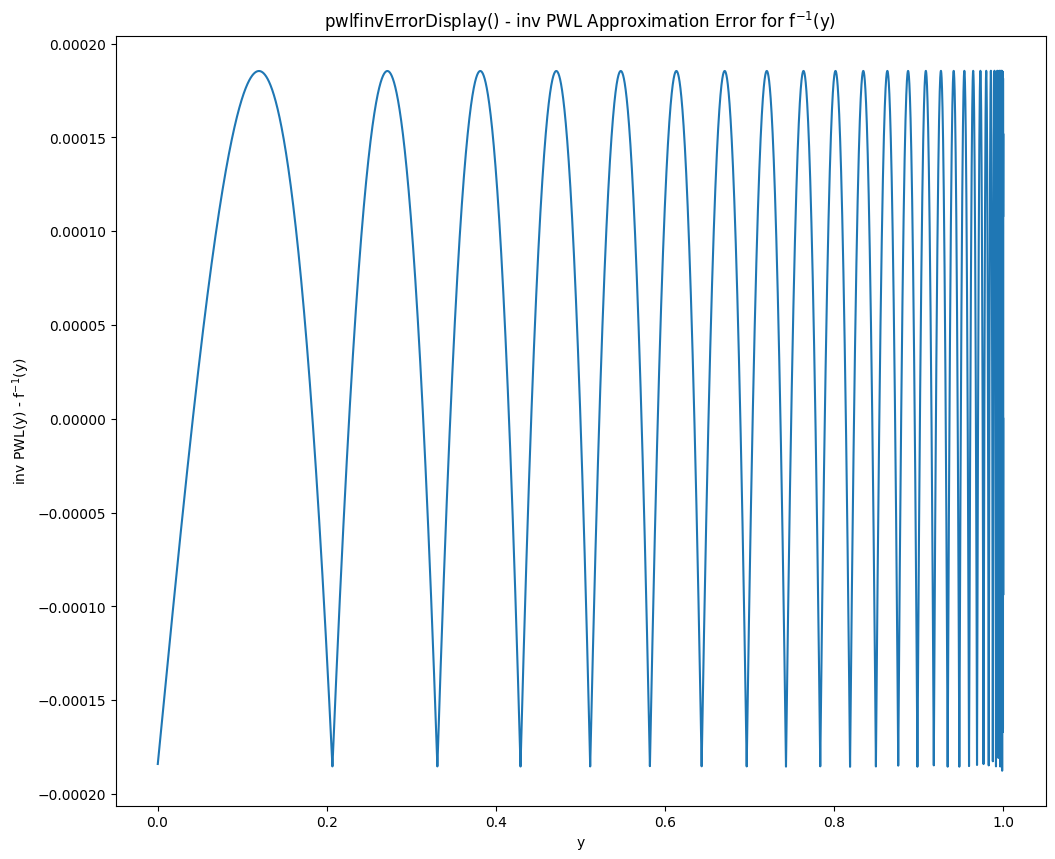

In [ ]:
pwlfinvErrorDisplay(fx1, f1_inv, fn = 'sinx_error_ex.png')

Figure saved to  sinx_error_inv_ey.png


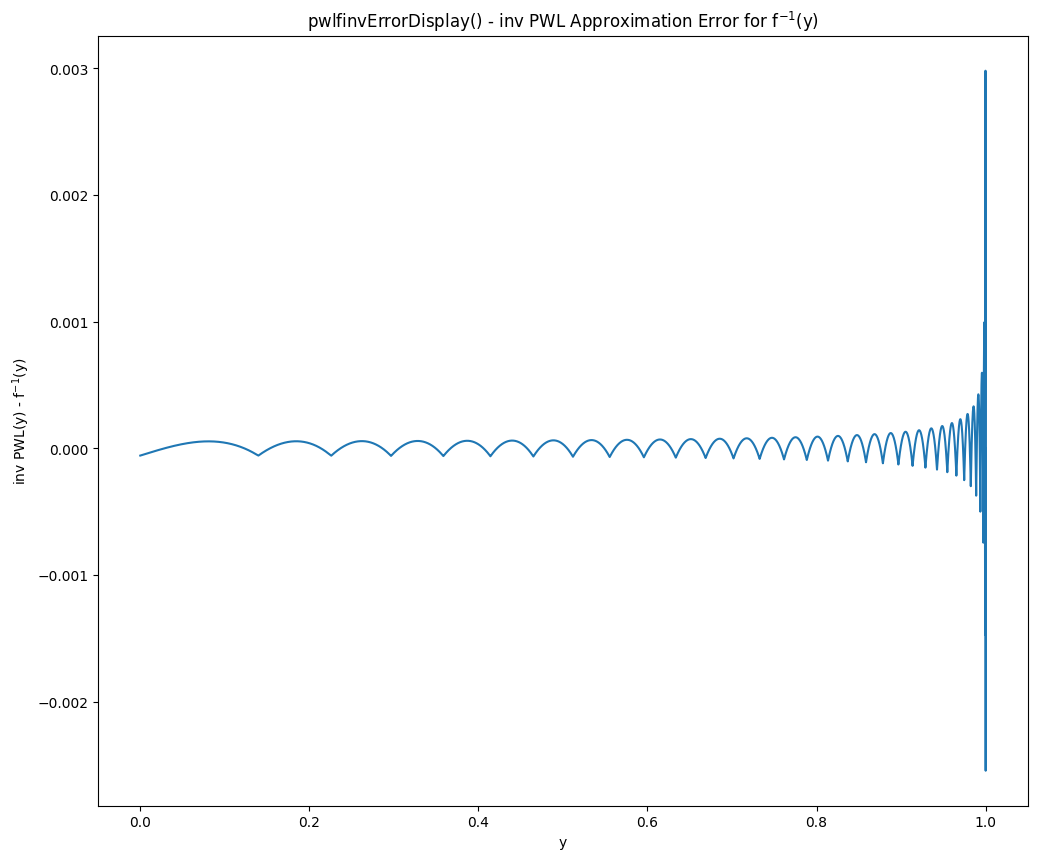

In [ ]:
pwlfinvErrorDisplay(fx, f1_inv, fn = 'sinx_error_inv_ey.png')

### $\varepsilon_n$ Example
- Use mode = $\varepsilon_n$ to approximate $f(x)=\frac{1}{\sqrt{1-x^2}}$ with optimal minimax error, where the distance metric is the Euclidean distance from any point in the PWL to the closest point in $(x,f(x))$

Note that in this example, the function $f(x)$ represents one quadrant of a circle to be approximated by linear segments.

This example code demonstrates how the pwl optimized with the function and mode="en" minimizes the maximum Euclidean distance between the function and the pwl by selecting the segments which are equally spaced angularly around the unit circle.

In [ ]:
# Example: f(x) = sqrt(1 - x^2), mode = En

def f1(x):
    xclip = np.clip(x, -1, 1)
    return (np.sqrt(1 - xclip**2))

def f1_inv(y):
    yclip = np.clip(y, -1, 1)
    return (np.sqrt(1 - yclip**2))

loopCntlDict={"minStep": 1/1024, "loopLim": 200000, "printSum": False, "relLim": 0.001}
xmin = 0
xmax = 1
mode = "en"

a1x = pwl(f1, xmin=xmin, xmax=xmax, N=32 ,mode=mode, loopCntlDict=loopCntlDict)
a1x.err.max(), a1x.err.min(), a1x.pivot

reverting at step 1202 0.00030176293626899865
Relative Error  0.0009990563407607522 met at loopCnt  2037


(0.0003003381867676482,
 0.0003000381319977854,
 array([0.024495, 0.073418, 0.122165, 0.170620, 0.218665, 0.266187,
        0.313070, 0.359203, 0.404475, 0.448778, 0.492004, 0.534051,
        0.574817, 0.614205, 0.652120, 0.688470, 0.723170, 0.756134,
        0.787284, 0.816545, 0.843847, 0.869124, 0.892314, 0.913363,
        0.932220, 0.948838, 0.963179, 0.975206, 0.984893, 0.992215,
        0.997154, 0.999700]))

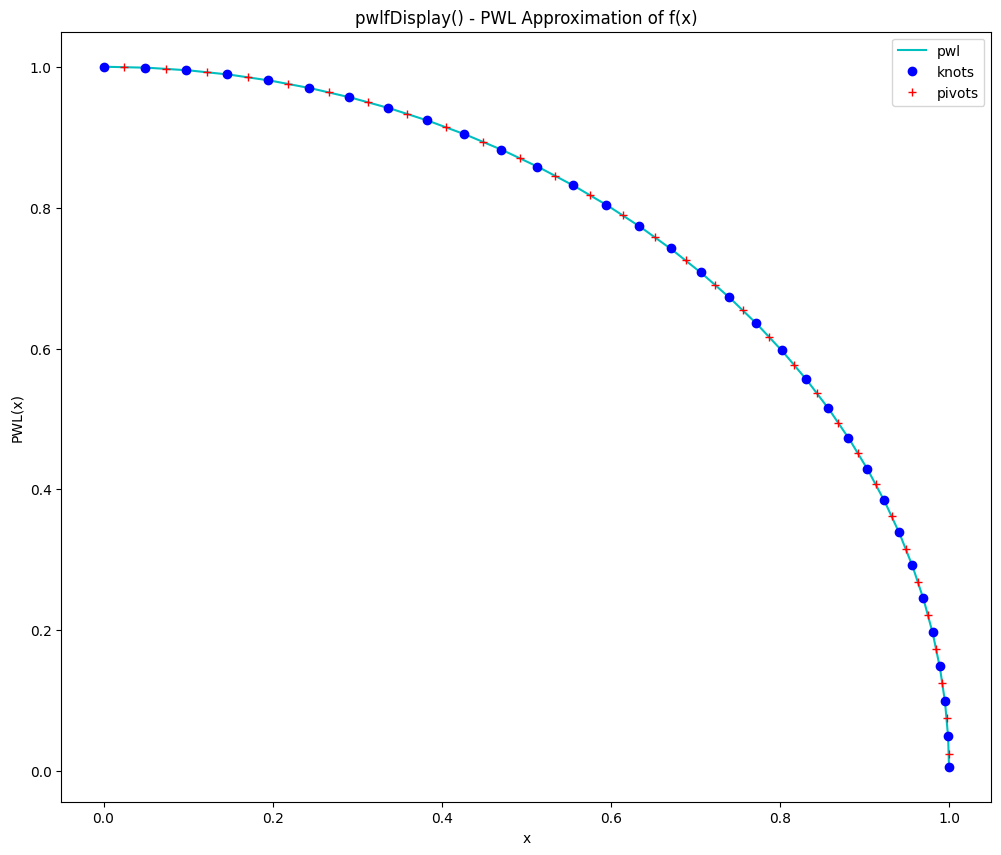

In [ ]:
pwlfDisplay(a1x)

Figure saved to  circ_tan_en.png


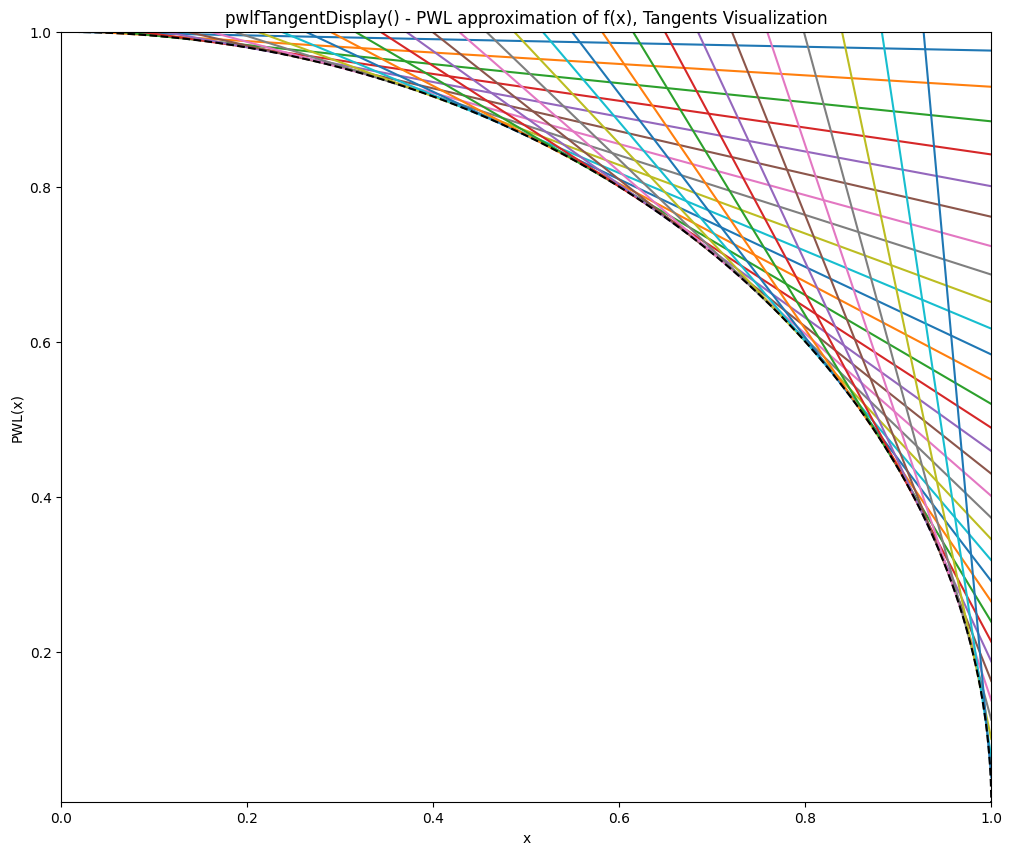

In [ ]:
pwlfTangentDisplay(a1x, fn = 'circ_tan_en.png')

/content/drive/My Drive/PWL Paper/Code/pwlClass.py:622: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(np.arctan(f1.f(f1.knot)/f1.knot)*(180/np.pi) % 180, index, "b-o", label="Knot Angles")


Figure saved to  circ_angle_en.png


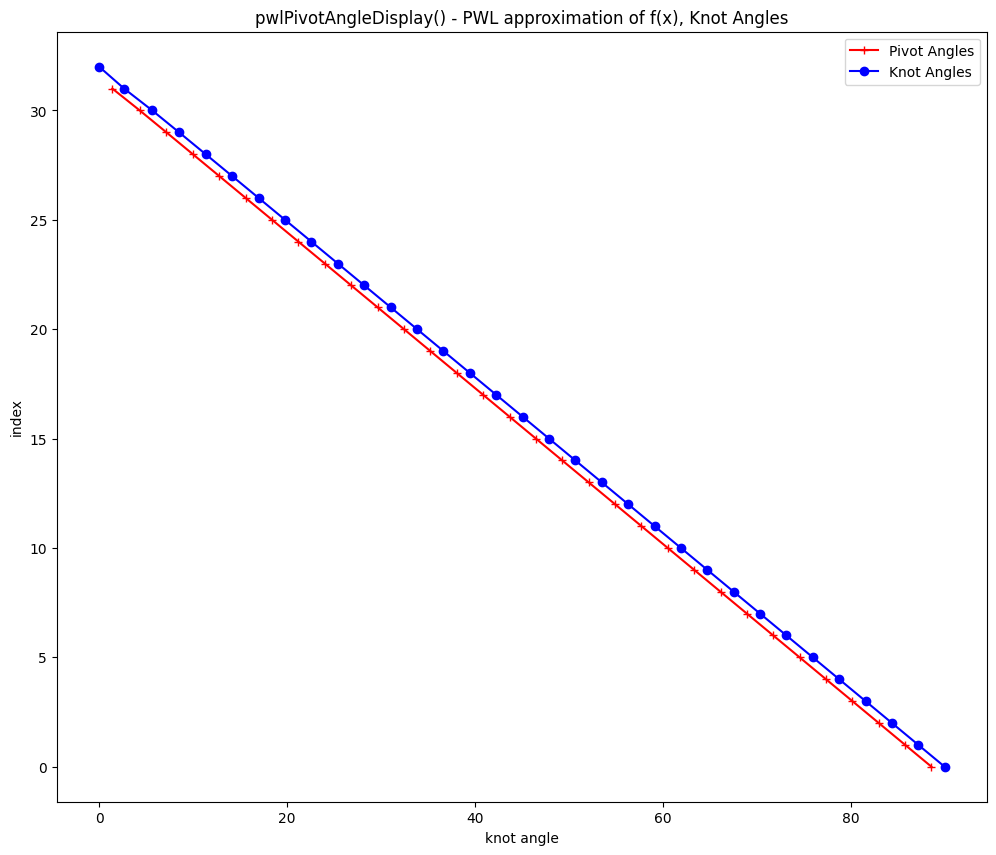

In [ ]:
pwlPivotAngleDisplay(a1x, fn = 'circ_angle_en.png')

In [ ]:
# Function to display the PWL approximation error for f(x) = sqrt(1 - x^2), mode = En
def pwlfEnErrorDisplay(f1: pwl, pts = 40001, fn ="", title=""):
    # Compare the PWL function error relative to the target function
    x = np.linspace(f1.xmin, f1.xmax, pts)
    err = np.sqrt(x**2 + (f1.fpwl(x)**2)) - 1
    plt.plot(x, err)
    if title == "":
        title = "pwlfEnErrorDisplay() - PWL Approximation Error for f(x)"
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("||PWL(x) - f(x)||")
    if fn != "":
        plt.savefig(fn)
        print("Figure saved to ", fn)
    plt.show()


Figure saved to  circ_error_en.png


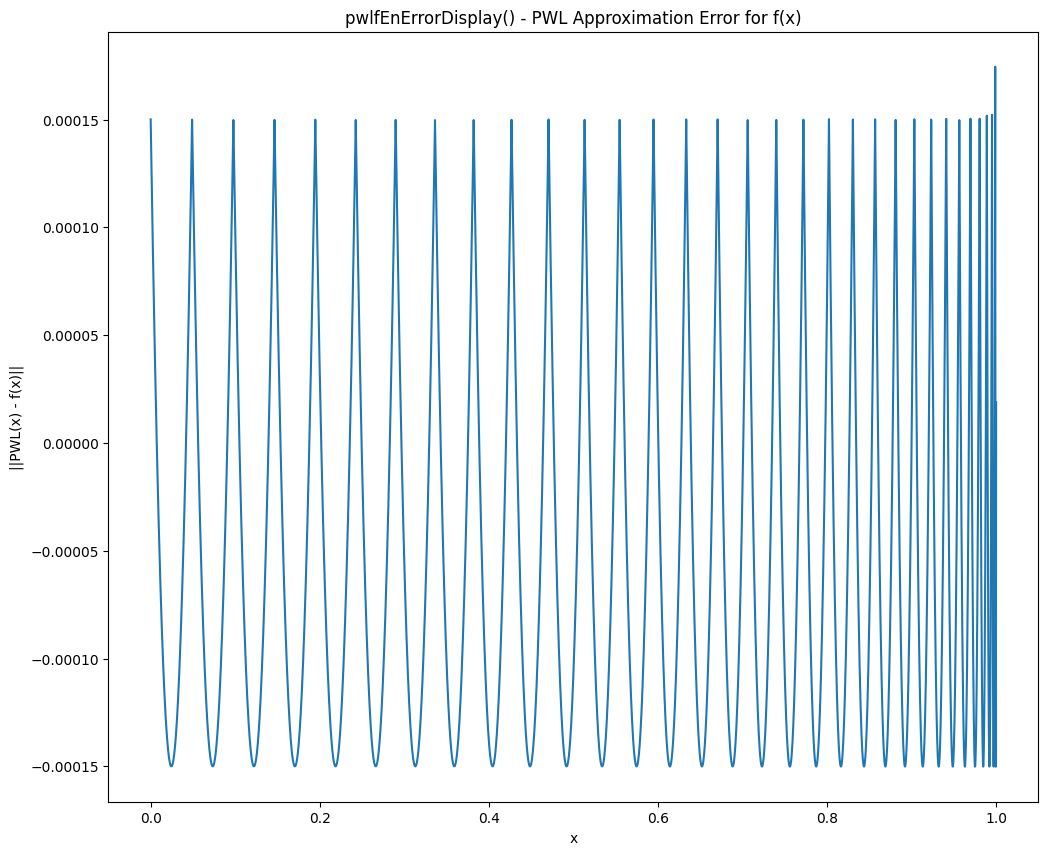

In [ ]:
pwlfEnErrorDisplay(a1x, fn = 'circ_error_en.png')

### References
[1] https://www.researchgate.net/publication/251882990_A_Recursive_Descent_Algorithm_for_Finding_the_Optimal_Minimax_Piecewise_Linear_Approximation_of_Convex_Functions